In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Training'
n_train_glioma = len(os.listdir(f'{train_dir}/glioma'))
n_train_mening = len(os.listdir(f'{train_dir}/meningioma'))
n_train_pit = len(os.listdir(f'{train_dir}/pituitary'))
n_train_non = len(os.listdir(f'{train_dir}/notumor'))



total_train = n_train_glioma + n_train_mening + n_train_pit + n_train_non

In [4]:
count = [n_train_glioma, n_train_mening, n_train_pit, n_train_non, total_train]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 1321
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 1339
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 1457
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 1595
----------------------------------------------------------------------------------------------------
Total counts of total images is 5712
----------------------------------------------------------------------------------------------------


In [5]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [n_train_glioma, n_train_mening, n_train_pit, n_train_non]

<ipython-input-6-8eae65173505>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


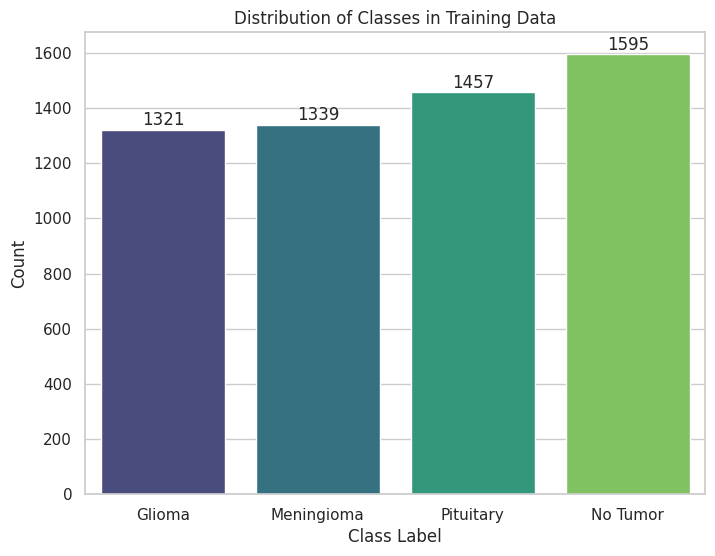

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [7]:
test_dir="/content/drive/MyDrive/Colab Notebooks/Testing"

n_test_glioma = len(os.listdir(f'{test_dir}/glioma'))
n_test_mening = len(os.listdir(f'{test_dir}/meningioma'))
n_test_pit = len(os.listdir(f'{test_dir}/pituitary'))
n_test_non = len(os.listdir(f'{test_dir}/notumor'))



total_test = n_test_glioma + n_test_mening + n_test_pit + n_test_non

In [8]:
count = [n_test_glioma, n_test_mening, n_test_pit, n_test_non, total_test]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 300
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 306
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 300
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 405
----------------------------------------------------------------------------------------------------
Total counts of total images is 1311
----------------------------------------------------------------------------------------------------


In [9]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumow']
class_counts = [n_test_glioma, n_test_mening, n_test_pit, n_test_non]

<ipython-input-10-584863791459>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


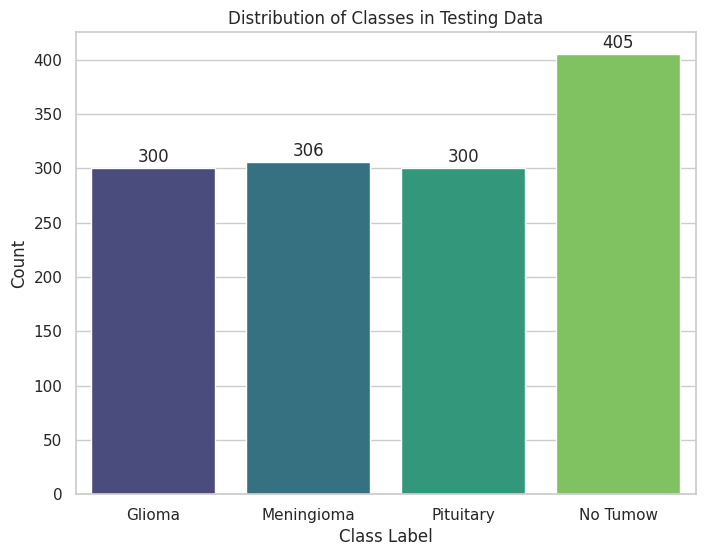

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [11]:
 train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 zoom_range=0.1,
                                 shear_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="categorical")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_vgg16_model(input_shape):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))  # 4 classes for glioma, meningioma, pituitary, and no tumor

    return model

vgg16_model = build_vgg16_model((224, 224, 3))
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   